# Question C

In [72]:
import autograd.numpy as np
import autograd

In [73]:
def quadratic_form(X,M):
    return(
    np.dot( np.dot(X.T , M)    ,  X)
    )

def f1(X):
    return(
        
        np.dot(X.T,X)
        +
        quadratic_form(X,np.array([[3,-1],[-1,3]]))
        -
        np.dot(np.array([1,0]).T,X)
        +
        np.dot(np.array([0,-1]).T,X)
    )

In [74]:
autograd_f1 = autograd.grad(f1)

In [75]:
autograd_f1(np.array([1/6,1/6]))

array([ 5.55111512e-17, -5.55111512e-17])

In [76]:
def grad_f1(X):
    return(np.array(
    [   8*X[0]-2*X[1]-1,
        8*X[1]-2*X[0]-1   ]))

In [78]:
np.shape(grad_f1(np.array([1/6,1/6])))

(2,)

# Question D

In [79]:
def f2(X):
    return(
        
        np.sin(
        np.dot(
            (X - np.array([1,0])).T,
            (X - np.array([1,0]))
        )
        )
        +
        quadratic_form(X - np.array([0,-1]),
                       np.array([[3,-1],[-1,3]]))
        )

In [80]:
autograd_f2 = autograd.grad(f2)

In [81]:
def grad_f2(X):
    return(np.array(
    [  
        2*((X[0]-1)*np.cos(X[0]**2+X[1]**2-2*X[0]+1)+3*X[0]-X[1]-1),
        2*(X[1]*np.cos(X[0]**2+X[1]**2-2*X[0]+1)+3*X[1]-X[0]+3)
        
    ]))

In [83]:
np.shape(grad_f2(np.array([1/6,1/6])))

(2,)

# Question E

In [9]:
def f3(X):
    return(
        1.0 - (
            np.exp(-np.dot(
            (X - np.array([1,0])).T,
            (X - np.array([1,0]))))
            +
            np.exp(-quadratic_form(X - np.array([0,-1]),
                       np.array([[3,-1],[-1,3]])))
            -(1.0/10)*np.log(
                (1.0/10000)+((X[0]*X[0] + X[1]*X[1])/100
                            ))
        
        ))

In [10]:
autograd_f3 = autograd.grad(f3)

In [11]:
X = np.array([0.16666667, 0.16666667])
autograd_f3(X)

array([-0.33147636,  0.82285493])

# Question F

Gradient descent for f2

We chose a small step size (which is probably not optimal) to have a good graphical exemple of a gradient descent. 

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


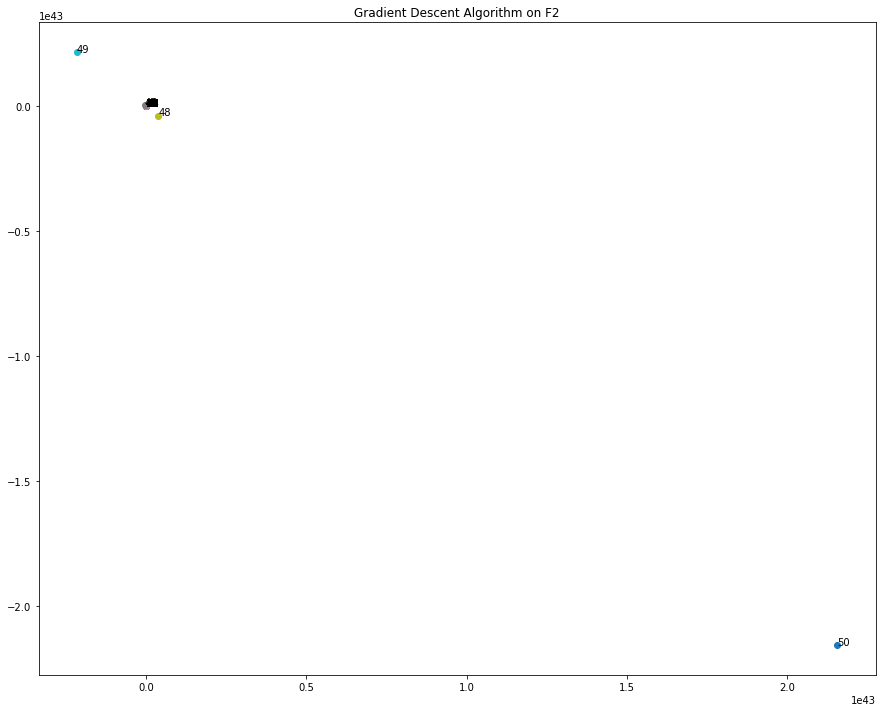

In [63]:
Xs = [ np.array([1.0,-1.0]) ]

epsilon = 0.00000000000001
step_size = 1.1

for step in range(50):
    if np.linalg.norm(autograd_f2(Xs[step])) > epsilon :
        Xs += [Xs[step] - step_size*autograd_f2(Xs[step])]
    else:
        print("Gradient descent terminated at the iteration "+str(step))
        break
Ys = []
for X in Xs:
    Ys += [f2(X)]

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-1.0, 1.2, delta)
y = np.arange(-2.0, 0.0, delta)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(y)):
    line = []
    for j in range(len(x)):
        line += [f2(np.array([x[j],y[i]]))]
    Z += [line]
Z = np.array(Z)

fig, ax = plt.subplots(figsize = (15,12))
CS = ax.contour(X, Y, Z , levels = 20)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gradient Descent Algorithm on F2')
for i in range(len(Xs)):
    ax.scatter(Xs[i][0],Xs[i][1])
    ax.annotate(str(i),(Xs[i][0],Xs[i][1]))


Gradient descent for f3


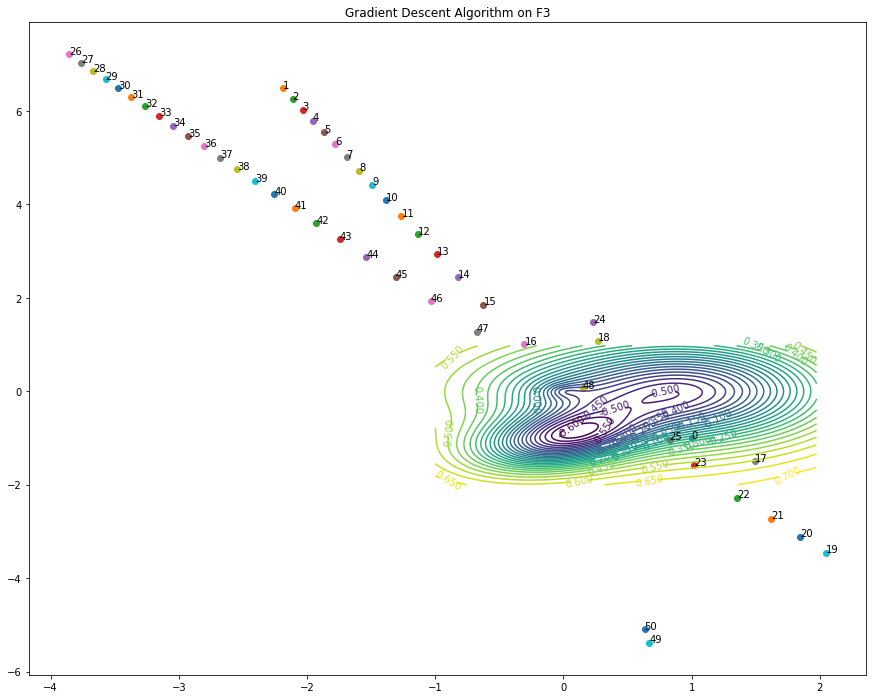

In [60]:
Xs = [ np.array([1.0,-1.0]) ]

epsilon = 0.0000000000001
step_size = 8.0


1

for step in range(50):
    if np.linalg.norm(autograd_f3(Xs[step])) > epsilon :
        Xs += [Xs[step] - step_size*autograd_f3(Xs[step])]
    else:
        print("Gradient descent terminated at the iteration "+str(step))
        break
Ys = []
for X in Xs:
    Ys += [f3(X)]

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-1.0, 2.0, delta)
y = np.arange(-2.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(y)):
    line = []
    for j in range(len(x)):
        line += [f3(np.array([x[j],y[i]]))]
    Z += [line]
Z = np.array(Z)

fig, ax = plt.subplots(figsize = (15,12))
CS = ax.contour(X, Y, Z ,29 )
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gradient Descent Algorithm on F3')
for i in range(len(Xs)):
    ax.scatter(Xs[i][0],Xs[i][1])
    ax.annotate(str(i),(Xs[i][0],Xs[i][1]))